In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xlrd')
from datetime import datetime

In [2]:
data_dir = 'C:\\Users\\CHENGG\\Desktop\\PowerStation_KerrawarryCreekTrail\\Data\\'
aqms_loc = ['AlbionParkSouth', 'Bargo', 'Goulburn']
start_date = np.arange(2018,2024,1)
end_date = np.arange(2019,2025,1)

In [5]:
dict = {}
for aqms in aqms_loc:
    df = pd.DataFrame()
    for the_date in start_date:
        temp_data_source = data_dir + aqms + '_' + str(the_date) + '-' + str(the_date + 1) + '.xls'
        temp_data = pd.read_excel(temp_data_source, sheet_name='worksheet1', header=2)
        df = pd.concat([df, temp_data], axis=0, join='outer')
    df.drop_duplicates(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df['Time'] = df['Time'].replace('24:00', '00:00')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
    df['hour'] = df['Time'].dt.hour
    df['year'] = df.Date.dt.year
    df['month'] = df.Date.dt.month
    dict[aqms] = df

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [9]:
dict['AlbionParkSouth'].head(1)

,Date,Time,ALBION PARK SOUTH WDR 1h average [°],ALBION PARK SOUTH TEMP 1h average [°C],ALBION PARK SOUTH WSP 1h average [m/s],ALBION PARK SOUTH NO2 1h average [pphm],ALBION PARK SOUTH PM10 1h average [µg/m³],ALBION PARK SOUTH PM2.5 1h average [µg/m³],ALBION PARK SOUTH HUMID 1h average [%],ALBION PARK SOUTH RAIN 1h average [mm/m²],hour,year,month
0,2018-01-01,1900-01-01 01:00:00,309.5,20.4,0.4,0.3,18.6,13.3,89.3,NaN,1,2018,1


In [10]:
dict['Bargo'].head(1)

,Date,Time,BARGO WDR 1h average [°],BARGO TEMP 1h average [°C],BARGO WSP 1h average [m/s],BARGO NO2 1h average [pphm],BARGO PM10 1h average [µg/m³],BARGO PM2.5 1h average [µg/m³],BARGO HUMID 1h average [%],BARGO RAIN 1h average [mm/m²],hour,year,month
0,2018-01-01,1900-01-01 01:00:00,338.4,19.3,0.3,0.3,24.4,7.7,91.2,NaN,1,2018,1


In [11]:
dict['Goulburn'].head(1)

,Date,Time,GOULBURN WDR 1h average [°],GOULBURN TEMP 1h average [°C],GOULBURN WSP 1h average [m/s],GOULBURN NO2 1h average [pphm],GOULBURN PM10 1h average [µg/m³],GOULBURN PM2.5 1h average [µg/m³],GOULBURN HUMID 1h average [%],GOULBURN RAIN 1h average [mm/m²],hour,year,month
0,2018-01-01,1900-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018,1


In [ ]:
# get the windspeed plot to see the wind speed fluctuations
# ['AlbionParkSouth', 'Bargo', 'Goulburn']
criterion = 164
# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# Boat Creek
y = df_bc['Nitrogen Dioxide (ug/m^3)']
x = df_bc.index
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# Memorial Park
y = df_mp['Nitrogen Dioxide (ug/m^3)']
x = df_mp.index
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('Memorial Park AMNS', fontsize=TickSize)

# South Gladstone
y = df_sg['Nitrogen Dioxide (ug/m^3)']
x = df_sg.index
ax3.plot(x,y,'k-')
ax3.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax3.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax3.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax3.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax3.tick_params(axis='y', labelsize=TickSize)
ax3.set_title('South Gladstone AMNS', fontsize=TickSize)

# plot
plt.tight_layout()
plt.show()

C:\Users\CHENGG\Desktop\pythonProject\venv\lib\site-packages\windrose\windrose.py:667: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patch = mpl.patches.Rectangle(


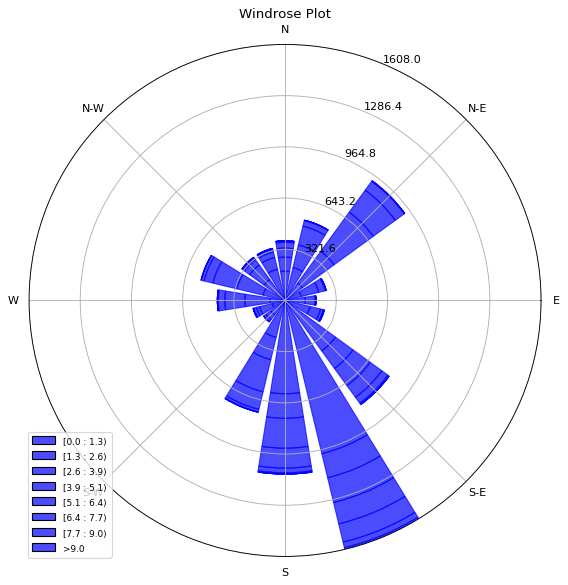

In [36]:
from matplotlib.projections import PolarAxes
from windrose import WindroseAxes

# Create a windrose plot
ax = WindroseAxes.from_ax()
ax.bar(df['ALBION PARK SOUTH WDR 1h average [°]'], df['ALBION PARK SOUTH WSP 1h average [m/s]'], bins=8, color='blue', alpha=0.7)
ax.set_legend()
plt.title('Windrose Plot')
plt.show()